/Users/david/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


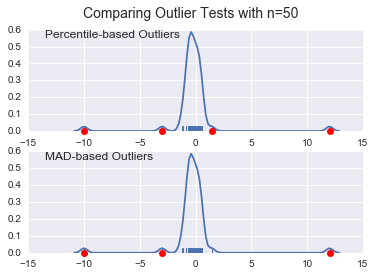

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
def main():
    for num in [50]:
        # Generate some data
        x = np.random.normal(0, 0.5, num-3)

        # Add three outliers...
        x = np.r_[x, -3, -10, 12]
        plot(x)

    plt.show()

def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

def plot(x):
    fig, axes = plt.subplots(nrows=2)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top')
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=14)

main()

In [2]:
import sys
sys.path

['',
 '/Users/david/anaconda/lib/python35.zip',
 '/Users/david/anaconda/lib/python3.5',
 '/Users/david/anaconda/lib/python3.5/plat-darwin',
 '/Users/david/anaconda/lib/python3.5/lib-dynload',
 '/Users/david/anaconda/lib/python3.5/site-packages/Sphinx-1.4.1-py3.5.egg',
 '/Users/david/anaconda/lib/python3.5/site-packages/setuptools-23.0.0-py3.5.egg',
 '/Users/david/anaconda/lib/python3.5/site-packages',
 '/Users/david/anaconda/lib/python3.5/site-packages/aeosa',
 '/Users/david/anaconda/lib/python3.5/site-packages/IPython/extensions',
 '/Users/david/.ipython']